In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree 
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




In [59]:
data = pd.read_csv('black_white_wage_gap.csv')

print(data.head())

X = data.drop(['black_women_median', 'black_women_average'], axis=1)  # Features
y = data['black_women_average']  # Target variable


   year  white_median  white_average  black_median  black_average  \
0  2022         24.96          34.49         19.60          25.61   
1  2021         25.40          34.50         19.45          25.40   
2  2020         25.98          34.86         19.85          26.03   
3  2019         24.39          32.79         18.45          24.09   
4  2018         23.97          32.44         17.57          23.53   

   white_men_median  white_men_average  black_men_median  black_men_average  \
0             27.11              39.10             20.02              27.43   
1             27.76              38.78             20.08              26.88   
2             28.36              39.08             20.56              27.40   
3             27.39              36.84             19.31              25.18   
4             26.79              36.55             18.66              24.67   

   white_women_median  white_women_average  black_women_median  \
0               22.47                29.50  

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coefficients = pd.DataFrame({'Predictor': X.columns, 'Coefficient': model.coef_})
print (coefficients)

Mean Squared Error: 0.001524487547295872
R^2 Score: 0.9995948495516743
              Predictor  Coefficient
0                  year     0.002184
1          white_median     0.022832
2         white_average    -0.696277
3          black_median    -0.032246
4         black_average     1.822503
5      white_men_median    -0.006371
6     white_men_average     0.326105
7      black_men_median     0.073698
8     black_men_average    -0.865155
9    white_women_median    -0.010107
10  white_women_average     0.387026


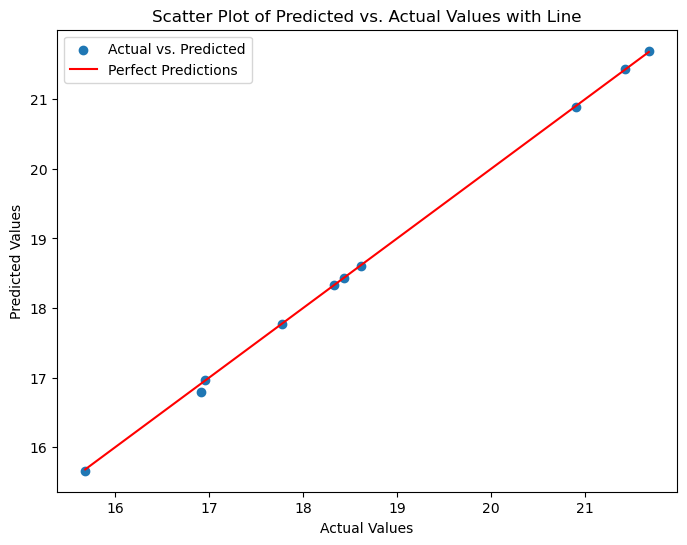

In [62]:
# Scatter plot of predicted vs. actual values with line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label='Perfect Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values with Line")
plt.legend()
plt.show()

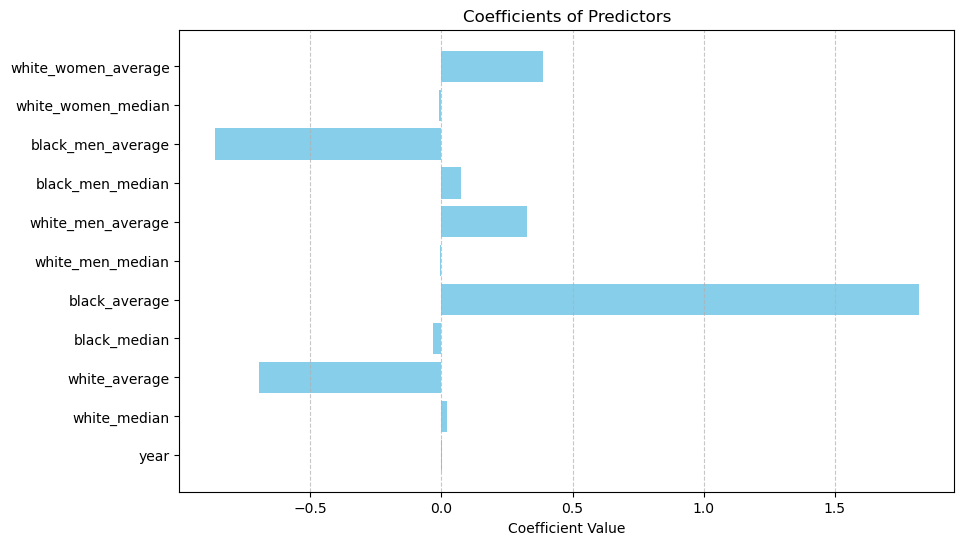

In [63]:
predictors = coefficients['Predictor']
coefficients = coefficients['Coefficient']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(predictors, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Predictors')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [64]:
#Decision Trees
model_2 = DecisionTreeRegressor()

model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

print("MSE: ", mse_2)
print("R2: ", r2_2)

MSE:  0.19772000000000012
R2:  0.9474535906934494


In [65]:
dot_data = export_graphviz(model_2,
                            out_file=None,
                            feature_names=X_train.columns,
                            filled=True,
                            rounded=True,
                            special_characters=True)

# Create a GraphViz object and draw the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree", view=True)

'decision_tree.pdf'

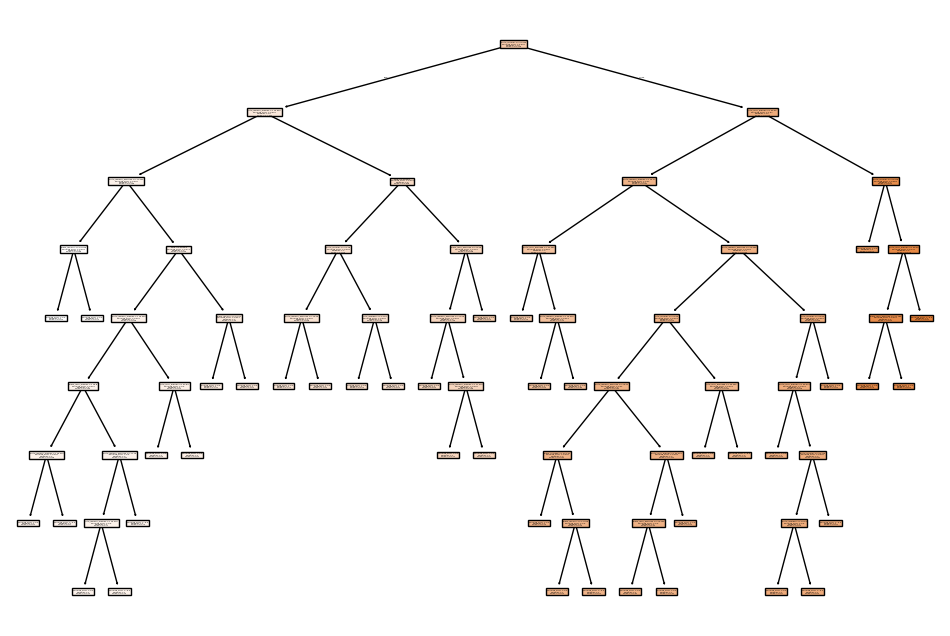

In [66]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(model_2, 
          feature_names=X_train.columns, 
          filled=True, 
          ax=ax)
plt.show()

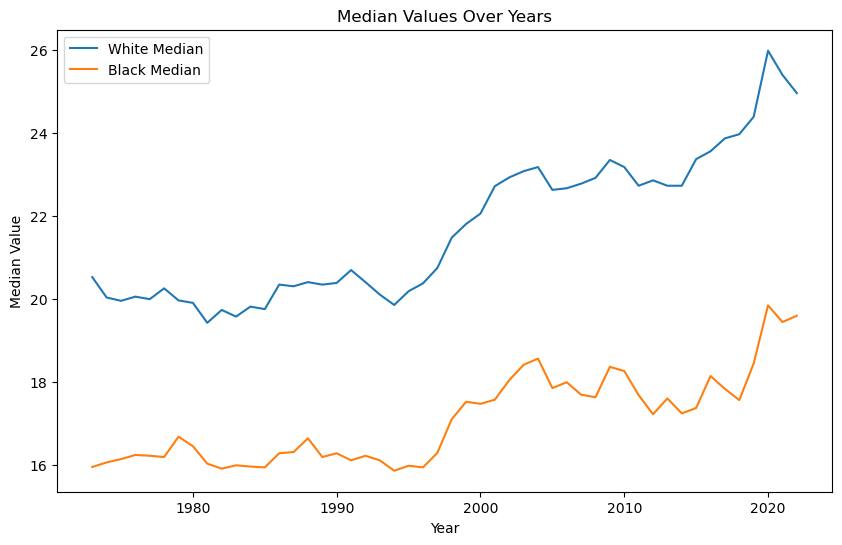

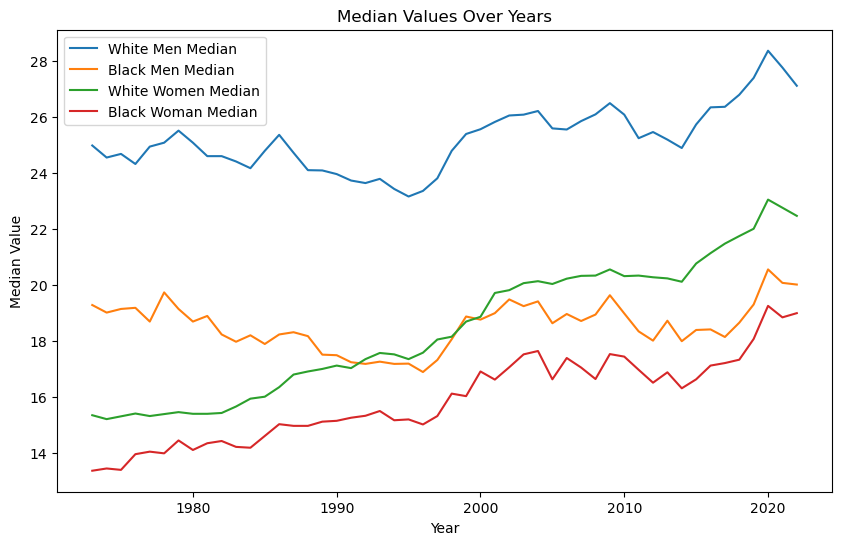

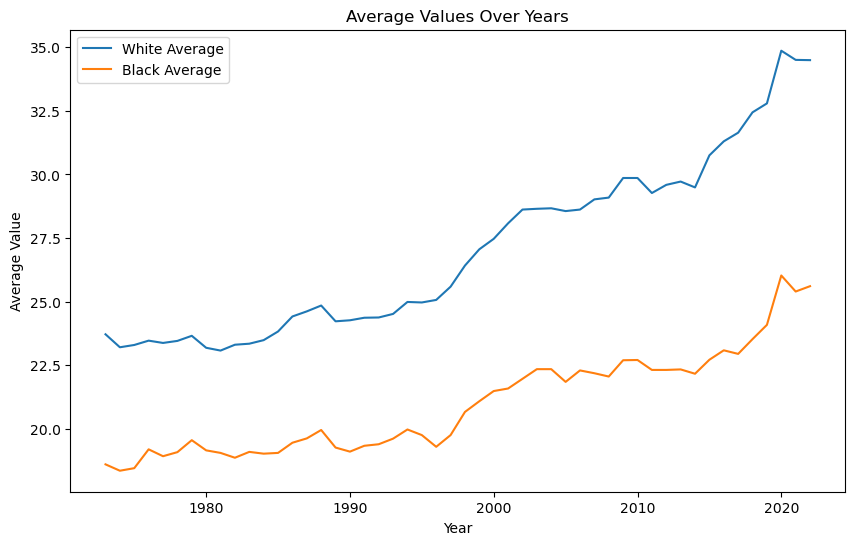

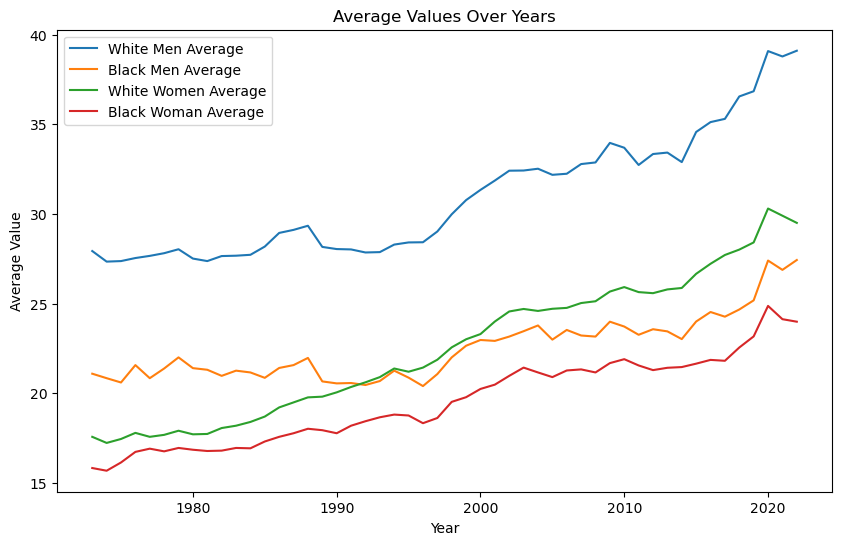

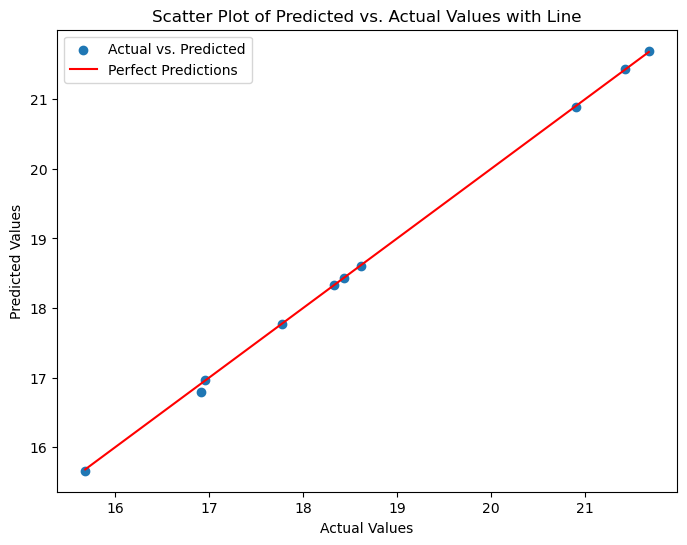

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create line plot for median values over the years
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['white_median'], label='White Median')
plt.plot(data['year'], data['black_median'], label='Black Median')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.title('Median Values Over Years')
plt.legend()
plt.show()

# Create line plot for median values over the years
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['white_men_median'], label='White Men Median')
plt.plot(data['year'], data['black_men_median'], label='Black Men Median')
plt.plot(data['year'], data['white_women_median'], label='White Women Median')
plt.plot(data['year'], data['black_women_median'], label='Black Woman Median')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.title('Median Values Over Years')
plt.legend()
plt.show()

# Create line plot for median values over the years
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['white_average'], label='White Average')
plt.plot(data['year'], data['black_average'], label='Black Average')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Values Over Years')
plt.legend()
plt.show()

# Create line plot for median values over the years
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['white_men_average'], label='White Men Average')
plt.plot(data['year'], data['black_men_average'], label='Black Men Average')
plt.plot(data['year'], data['white_women_average'], label='White Women Average')
plt.plot(data['year'], data['black_women_average'], label='Black Woman Average')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Average Values Over Years')
plt.legend()
plt.show()



# Scatter plot of predicted vs. actual values with line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', label='Perfect Predictions')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values with Line")
plt.legend()
plt.show()





